In [2]:
%matplotlib inline
from parcels import FieldSet, ParticleSet, Variable, JITParticle, AdvectionRK4, plotTrajectoriesFile
import numpy as np
import math
from datetime import timedelta
from operator import attrgetter
import matplotlib.pyplot as plt
import netCDF4 as nc
import os
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy as crs
cwd =os.getcwd()

plt.rcParams['font.size'] = 18

# test analysis and trajectories

In [4]:
path = cwd +'/../data/'
data = 'Poole_harbour_particles.nc'


data= xr.open_dataset(path + data)#just use output_paticles for new data
print(data)

#ignore points on land
#data = data.where(data_f['on_land'] == False, drop = True)

<xarray.Dataset>
Dimensions:     (traj: 10000, obs: 721)
Dimensions without coordinates: traj, obs
Data variables:
    time        (traj, obs) datetime64[ns] ...
    trajectory  (traj, obs) float64 ...
    lon         (traj, obs) float32 ...
    lat         (traj, obs) float32 ...
    z           (traj, obs) float32 ...
    on_land     (traj, obs) float32 ...
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.3.1
    parcels_mesh:           spherical


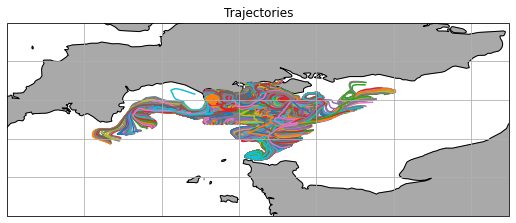

In [18]:
ext = (-5, 1.5,49,51.5)#Poole harbor 
#(3.5,11.5,53,57) Sylt
#(46, 60,-4,12.5) # extend of plot for trajectories

fig = plt.figure(figsize =(9,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title('Trajectories')

#ax.coastlines()
ax.add_feature(crs.feature.LAND, color = 'darkgrey')
ax.add_feature(crs.feature.COASTLINE,edgecolor = 'black')

ax.set_extent(ext)
ax.gridlines()
ax.plot(data['lon'].T,data['lat'].T);

# Heatmap

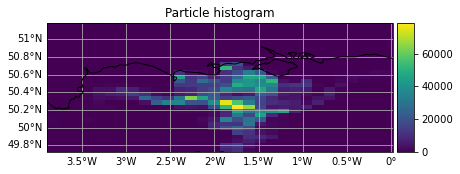

In [20]:
plotTrajectoriesFile(data_path, mode='hist2d', bins=[30, 30]);

# Animation

In [21]:
from datetime import timedelta as delta
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

outputdt = delta(hours=24)
timerange = np.arange(np.nanmin(data['time'].values),
                      np.nanmax(data['time'].values)+np.timedelta64(outputdt), 
                      outputdt)  # timerange in nanoseconds


In [59]:
stuck = data.where(data['on_land'] > .95)

In [67]:
%%capture
#%%inline
fig = plt.figure(figsize=(10,8),constrained_layout=True)
ax = plt.axes(projection=ccrs.PlateCarree())

#ax.set_xlim(0, 90000)
#ax.set_ylim(0, 50000)
ax.add_feature(crs.feature.LAND, edgecolor='black', color = 'darkgrey')
ax.add_feature(crs.feature.COASTLINE, edgecolor='black')

ax.set_extent(ext)
ax.gridlines()

time_id = np.where(data['time'] == timerange[0]) # Indices of the data where time = 0

scatter = ax.scatter(data['lon'].values[time_id], data['lat'].values[time_id],label= 'in ocean')
scatter_s = ax.scatter(stuck['lon'].values[time_id], stuck['lat'].values[time_id], c = 'tab:orange', s = 200, label = 'stuck')

fig.legend()
t = str(timerange[0].astype('timedelta64[h]'))
title = ax.set_title('Particles at t = '+t)

def animate(i):
    #t = str(timerange[i].astype('timedelta64[h]'))
    #title.set_text('Particles at h = '+t)
    ax.set_title(f'Particles at day {i+1}', color = 'white')
    
    
    time_id = np.where(data['time'] == timerange[i])
    scatter.set_offsets(np.c_[data['lon'].values[time_id], data['lat'].values[time_id]])
    scatter_s.set_offsets(np.c_[stuck['lon'].values[time_id], stuck['lat'].values[time_id]])
    
anim = FuncAnimation(fig, animate, frames = len(timerange), interval=100)


In [68]:
HTML(anim.to_jshtml())